In [0]:
!nvidia-smi

Wed Apr 22 16:58:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!pip install gdown
!pip install tensorflow_text

     |████████████████████████████████| 8.3MB 8.1MB/s 
     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 3.9MB 43.6MB/s 
     |████████████████████████████████| 450kB 34.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=156854d164759a9455f6b9ec8b286d8b2e52d676d8b83387ecca238d4b1feb32
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled 

In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 18kB/s 


In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc 
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#FF5733","#DAF7A6","#FFC300","#581845","#2874A6","#AF7AC5"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] =12,8

RANDOM_SEED=42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [0]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**DATASET**

In [0]:
DATASET_COLUMNS = ["sentiment", "id", "date", "query", "username", "text"]

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BachelorThesis/data/trainData.csv', encoding='latin-1', names=DATASET_COLUMNS)
df

,sentiment,id,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [0]:
df.shape

(1600000, 6)

In [0]:
df.sentiment.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [0]:
df.text.head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [0]:
df['sentiment_type'] = df['sentiment'].apply(lambda x: "negative" if x == 0 else "positive")

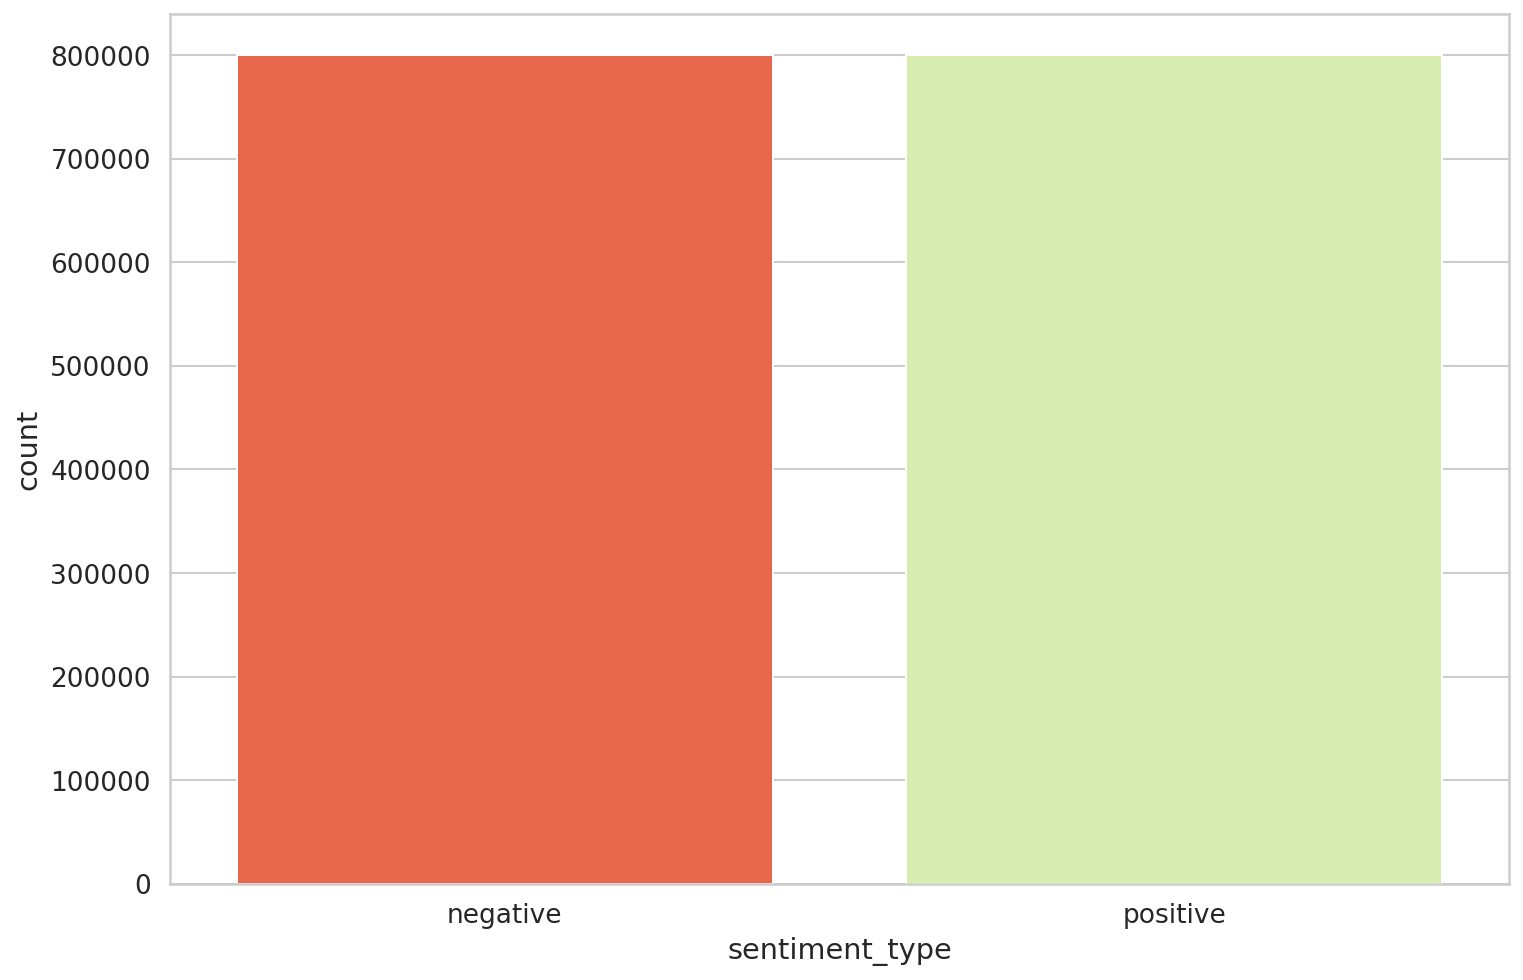

In [0]:
sns.countplot(df.sentiment_type)

In [0]:
negative_tweets = df[df.sentiment_type == 'negative']
positive_tweets = df[df.sentiment_type == 'positive']

In [0]:
negative_tweets_sample = negative_tweets.sample(frac=0.1)
positive_tweets_sample = positive_tweets.sample(frac=0.1)

In [0]:
print(negative_tweets_sample.shape)
print(positive_tweets_sample.shape)

(80000, 7)
(80000, 7)


In [0]:
tweets_df=negative_tweets_sample.append(positive_tweets_sample).reset_index(drop=True)

In [0]:
tweets_df.head()

,sentiment,id,date,query,username,text,sentiment_type
0,0,1974671194,Sat May 30 13:36:31 PDT 2009,NO_QUERY,simba98,@xnausikaax oh no! where did u order from? tha...,negative
1,0,1997882236,Mon Jun 01 17:37:11 PDT 2009,NO_QUERY,Seve76,A great hard training weekend is over. a coup...,negative
2,0,2177756662,Mon Jun 15 06:39:05 PDT 2009,NO_QUERY,x__claireyy__x,"Right, off to work Only 5 hours to go until I...",negative
3,0,2216838047,Wed Jun 17 20:02:12 PDT 2009,NO_QUERY,Balasi,I am craving for japanese food,negative
4,0,1880666283,Fri May 22 02:03:31 PDT 2009,NO_QUERY,djrickdawson,Jean Michel Jarre concert tomorrow gotta work...,negative


In [0]:
tweets_df = tweets_df[['text','sentiment_type']]
tweets_df.head()

,text,sentiment_type
0,@xnausikaax oh no! where did u order from? tha...,negative
1,A great hard training weekend is over. a coup...,negative
2,"Right, off to work Only 5 hours to go until I...",negative
3,I am craving for japanese food,negative
4,Jean Michel Jarre concert tomorrow gotta work...,negative


**Universal Sentence Encoder (use)**


In [0]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

**Preprocessing**

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
type_one_hot = OneHotEncoder(sparse=False).fit_transform(
    tweets_df.sentiment_type.to_numpy().reshape(-1,1)
)
type_one_hot.shape

(160000, 2)

In [0]:
type_one_hot[0]

array([1., 0.])

In [0]:
train_tweets, test_tweets, y_train , y_test =\
  train_test_split(
      tweets_df.text, 
      type_one_hot, 
      test_size=0.1, 
      random_state=RANDOM_SEED
      )

In [0]:
train_tweets.shape


(144000,)

In [0]:
test_tweets.shape


(16000,)

In [0]:
x_train = []
for r in tqdm(train_tweets):
  embedding = use(r)
  tweet_embedding = tf.reshape(embedding, [-1]).numpy()
  x_train.append(tweet_embedding)

x_train = np.array(x_train)

100%|██████████| 144000/144000 [32:20<00:00, 74.20it/s]


In [0]:
x_test = []
for r in tqdm(test_tweets):
  embedding = use(r)
  tweet_embedding = tf.reshape(embedding, [-1]).numpy()
  x_test.append(tweet_embedding)

x_test = np.array(x_test)

100%|██████████| 16000/16000 [03:34<00:00, 74.73it/s]


**Model**

In [0]:
test_tweets.iloc[2]

'And sore throat again...damn it!  And where the ef is my camera?'

In [0]:
y_test[2]

array([1., 0.])

Sentiment Analysis

In [0]:
model = keras.Sequential()

model.add(
    keras.layers.Dense(
        units=256,
        input_shape=(x_train.shape[1], ),
        activation='relu'
    )
)

model.add(keras.layers.Dropout(rate=0.5))

model.add(
    keras.layers.Dense(
        units=128,
        activation='relu'
    )
)

model.add(keras.layers.Dropout(rate=0.5))


model.add(keras.layers.Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

In [0]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=True
)

Train on 129600 samples, validate on 14400 samples
Epoch 1/5
129600/129600 [==============================] - 24s 184us/sample - loss: 0.4621 - accuracy: 0.7820 - val_loss: 0.4423 - val_accuracy: 0.7921
Epoch 2/5
129600/129600 [==============================] - 23s 180us/sample - loss: 0.4402 - accuracy: 0.7959 - val_loss: 0.4338 - val_accuracy: 0.7933
Epoch 3/5
129600/129600 [==============================] - 23s 180us/sample - loss: 0.4297 - accuracy: 0.8023 - val_loss: 0.4314 - val_accuracy: 0.7975
Epoch 4/5
129600/129600 [==============================] - 23s 180us/sample - loss: 0.4188 - accuracy: 0.8072 - val_loss: 0.4292 - val_accuracy: 0.7984
Epoch 5/5
129600/129600 [==============================] - 24s 182us/sample - loss: 0.4109 - accuracy: 0.8118 - val_loss: 0.4276 - val_accuracy: 0.8001


In [0]:
model.evaluate(x_test,y_test)

16000/16000 [==============================] - 1s 67us/sample - loss: 0.4231 - accuracy: 0.8024


[0.4231026646196842, 0.802375]

Predicitions

In [0]:
print(test_tweets.iloc[2])

And sore throat again...damn it!  And where the ef is my camera?


In [0]:
print("Negative" if y_test[2][0] == 1 else "Positive")

Negative


In [0]:
y_pred = model.predict(x_test[2:3])
print(y_pred)

[[0.9805085  0.01949147]]


In [0]:
custom_pos_tweet = "Today was good! More to come in the future."
emb_custom_pos_tweet=use(custom_pos_tweet)
model.predict(emb_custom_pos_tweet)

array([[0.03485683, 0.96514314]], dtype=float32)

In [0]:
custom_neg_tweet = "Hitler did nothing wrong"
emb_custom_neg_tweet=use(custom_neg_tweet)
model.predict(emb_custom_neg_tweet)

array([[0.8037653 , 0.19623476]], dtype=float32)

In [0]:
#Random Sentence Generator
random_sentence1 = "Malls are great places to shop; I can find everything I need under one roof."
random_sentence2 = "He picked up trash in his spare time to dump in his neighbor's yard."


In [0]:
emb_random_sentence1=use(random_sentence1)
model.predict(emb_random_sentence1)

array([[0.5544976 , 0.44550246]], dtype=float32)

In [0]:
emb_random_sentence2=use(random_sentence2)
model.predict(emb_random_sentence2)

NameError: ignored